<a href="https://colab.research.google.com/github/Jb-rown/Collab_Projects/blob/main/Student_Wellbeing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data Wrangling
## Loading and Initial Inspection

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('student_wellbeing_final.csv')
print("Dataset loaded successfully")

Dataset loaded successfully


In [21]:
# Initial inspection
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())
print("\nDataset info:")
display(df.info())
print(df.describe())

Dataset shape: (300, 14)

First 5 rows:


,StudentID,Name,Age,Gender,Program,GPA,StudyHours,SleepHours,ExerciseHours,SocialMediaHours,MoodLevel,StressLevel,AttendanceRate (%),WellbeingScore
0,1001,Robert,24,M,Applications,2.73,10.0,6.0,6.0,5,10,6,92.80,5.033333
1,1002,Jennifer,32,F,Applications,3.03,19.0,6.0,4.0,4,2,3,87.80,3.190476
2,1003,Charles,28,M,Applications,2.89,1.0,9.0,0.0,5,9,9,81.30,4.028571
3,1004,Robert,25,M,Applications,3.19,14.0,9.0,5.0,6,10,7,77.95,4.857143
4,1005,Joseph,24,M,Data Science,2.28,13.0,8.0,4.0,1,5,1,80.12,4.577778



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   StudentID           300 non-null    int64   
 1   Name                300 non-null    object  
 2   Age                 300 non-null    int64   
 3   Gender              300 non-null    category
 4   Program             300 non-null    category
 5   GPA                 300 non-null    float64 
 6   StudyHours          300 non-null    float64 
 7   SleepHours          300 non-null    float64 
 8   ExerciseHours       300 non-null    float64 
 9   SocialMediaHours    300 non-null    int64   
 10  MoodLevel           300 non-null    int64   
 11  StressLevel         300 non-null    int64   
 12  AttendanceRate (%)  300 non-null    float64 
 13  WellbeingScore      300 non-null    float64 
dtypes: category(2), float64(6), int64(5), object(1)
memory usage: 29.2+ KB


None

         StudentID         Age         GPA  StudyHours  SleepHours  \
count   300.000000  300.000000  300.000000  300.000000  300.000000   
mean   1150.500000   25.853333    2.999200   11.910000    5.946667   
std      86.746758    5.397121    0.552323    6.871143    1.951885   
min    1001.000000   18.000000    0.860000    0.000000    3.000000   
25%    1075.750000   21.000000    2.700000    6.000000    4.000000   
50%    1150.500000   25.000000    3.030000   12.000000    6.000000   
75%    1225.250000   31.000000    3.380000   17.000000    7.250000   
max    1300.000000   35.000000    4.000000   24.000000    9.000000   

       ExerciseHours  SocialMediaHours   MoodLevel  StressLevel  \
count     300.000000        300.000000  300.000000   300.000000   
mean        3.040000          3.680000    5.693333     5.366667   
std         1.878874          2.354303    2.822382     2.824680   
min         0.000000          0.000000    1.000000     1.000000   
25%         1.000000          2.00

## Identifying and Summarizing Missing Values

In [22]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

print("Missing values summary:")
display(missing_data[missing_data['Missing Values'] > 0])

Missing values summary:


,Missing Values,Percentage (%)


## Handling Missing Values

In [24]:
# Handle missing values with justification

# GPA - impute with program median since academic performance varies by program
df['GPA'] = df.groupby('Program')['GPA'].transform(lambda x: x.fillna(x.median()))

# StudyHours - impute with overall median as study habits may be similar across programs
df['StudyHours'] = df['StudyHours'].fillna(df['StudyHours'].median())

# SleepHours - impute with recommended 7 hours as default
df['SleepHours'] = df['SleepHours'].fillna(7)

# ExerciseHours - impute with 3 hours as moderate exercise recommendation
df['ExerciseHours'] = df['ExerciseHours'].fillna(3)

# SocialMediaHours - impute with median as usage patterns vary
df['SocialMediaHours'] = df['SocialMediaHours'].fillna(df['SocialMediaHours'].median())

# AttendanceRate - impute with program mean as attendance norms may vary by program
df['AttendanceRate (%)'] = df.groupby('Program')['AttendanceRate (%)'].transform(lambda x: x.fillna(x.mean()))

# Gender - impute with mode (most frequent)
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# Verify no more missing values
print("\nMissing values after imputation:")
print(df.isnull().sum().sum())


Missing values after imputation:
0


/tmp/ipython-input-24-1863915941.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['GPA'] = df.groupby('Program')['GPA'].transform(lambda x: x.fillna(x.median()))
/tmp/ipython-input-24-1863915941.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['AttendanceRate (%)'] = df.groupby('Program')['AttendanceRate (%)'].transform(lambda x: x.fillna(x.mean()))


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values:")
print(missing_percentage)

# Handle missing values based on column characteristics
# For numerical columns, impute with median (less sensitive to outliers)
numerical_cols = ['GPA', 'StudyHours', 'SleepHours', 'ExerciseHours', 'SocialMediaHours', 'AttendanceRate (%)']
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# For categorical columns, impute with mode
categorical_cols = ['Gender', 'Program']
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

# Verify no more missing values
print("\nMissing values after imputation:")
print(df.isnull().sum())

Missing values per column:
StudentID              0
Name                   0
Age                    0
Gender                34
Program                0
GPA                   24
StudyHours            24
SleepHours            24
ExerciseHours         24
SocialMediaHours       0
MoodLevel              0
StressLevel            0
AttendanceRate (%)    24
dtype: int64

Percentage of missing values:
StudentID              0.000000
Name                   0.000000
Age                    0.000000
Gender                11.333333
Program                0.000000
GPA                    8.000000
StudyHours             8.000000
SleepHours             8.000000
ExerciseHours          8.000000
SocialMediaHours       0.000000
MoodLevel              0.000000
StressLevel            0.000000
AttendanceRate (%)     8.000000
dtype: float64

Missing values after imputation:
StudentID             0
Name                  0
Age                   0
Gender                0
Program               0
GPA                

## Data Type Conversion and Consistency

In [27]:
# Convert data types
df['Gender'] = df['Gender'].astype('category')
df['Program'] = df['Program'].astype('category')

# Ensure consistency in categorical values
df['Gender'] = df['Gender'].str.upper()
df['Program'] = df['Program'].str.title()

# Check unique values
print("\nUnique values in categorical columns:")
print("Gender:", df['Gender'].unique())
print("Program:", df['Program'].unique())


Unique values in categorical columns:
Gender: ['M' 'F']
Program: ['Applications' 'Data Science' 'Networking' 'Artificial Intelligence'
 'Cybersecurity']


## Creating Letter Grades

In [28]:
# Create Letter Grade based on GPA (assuming GPA is on 4.0 scale)
def calculate_letter_grade(gpa):
    if gpa >= 3.7:
        return 'A'
    elif gpa >= 3.3:
        return 'A-'
    elif gpa >= 3.0:
        return 'B+'
    elif gpa >= 2.7:
        return 'B'
    elif gpa >= 2.3:
        return 'B-'
    elif gpa >= 2.0:
        return 'C+'
    elif gpa >= 1.7:
        return 'C'
    elif gpa >= 1.3:
        return 'C-'
    elif gpa >= 1.0:
        return 'D+'
    elif gpa >= 0.7:
        return 'D'
    elif gpa >= 0.0:
        return 'D-'
    else:
        return 'F'

df['LetterGrade'] = df['GPA'].apply(calculate_letter_grade)
df['LetterGrade'] = df['LetterGrade'].astype('category')

# Display grade distribution
print("\nLetter Grade Distribution:")
print(df['LetterGrade'].value_counts().sort_index())


Letter Grade Distribution:
LetterGrade
A     32
A-    57
B     58
B+    79
B-    43
C     14
C+    12
C-     4
D      1
Name: count, dtype: int64


## Computing Wellbeing Score

In [29]:
# Compute WellbeingScore
df['SleepScore'] = df['SleepHours'] / 9
df['ExerciseScore'] = df['ExerciseHours'] / 7
df['MoodScore'] = df['MoodLevel'] / 10
df['StressScore'] = 1 - (df['StressLevel'] / 10)
df['SocialMediaScore'] = 1 - (df['SocialMediaHours'] / 8)
df['StudyScore'] = df['StudyHours'] / 20

# Weighted average wellbeing score
df['WellbeingScore'] = (
    0.2 * df['SleepScore'] +
    0.2 * df['ExerciseScore'] +
    0.2 * df['MoodScore'] +
    0.2 * df['StressScore'] +
    0.1 * df['SocialMediaScore'] +
    0.1 * df['StudyScore']
) * 100

# Check the distribution
print("\nWellbeing Score Summary:")
print(df['WellbeingScore'].describe())


Wellbeing Score Summary:
count    300.000000
mean      53.908862
std       11.616220
min       20.361111
25%       45.059524
50%       54.938492
75%       62.362103
max       81.285714
Name: WellbeingScore, dtype: float64


## Handling Duplicates

In [7]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Check for duplicate StudentIDs
print(f"Number of duplicate StudentIDs: {df['StudentID'].duplicated().sum()}")

Number of duplicate rows: 0
Number of duplicate StudentIDs: 0


## Outlier Detection and Treatment

In [11]:
# Identify outliers in numerical columns using IQR
numerical_cols = ['Age', 'GPA', 'StudyHours', 'SleepHours', 'ExerciseHours',
                 'SocialMediaHours', 'AttendanceRate (%)']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutliers in {col}: {len(outliers)}")





Outliers in Age: 0

Outliers in GPA: 5

Outliers in StudyHours: 0

Outliers in SleepHours: 0

Outliers in ExerciseHours: 0

Outliers in SocialMediaHours: 0

Outliers in AttendanceRate (%): 0


## Feature Engineering

In [13]:
df['WellbeingScore'] = (0.3 * df['MoodLevel'] + 0.2 * (10 - df['StressLevel']) +
                       0.2 * (df['SleepHours'] / 9) + 0.2 * (df['ExerciseHours'] / 7) +
                       0.1 * (10 - df['SocialMediaHours'] / 7))

# 2. Exploratory Data Analysis (EDA)

## Univariate Analysis

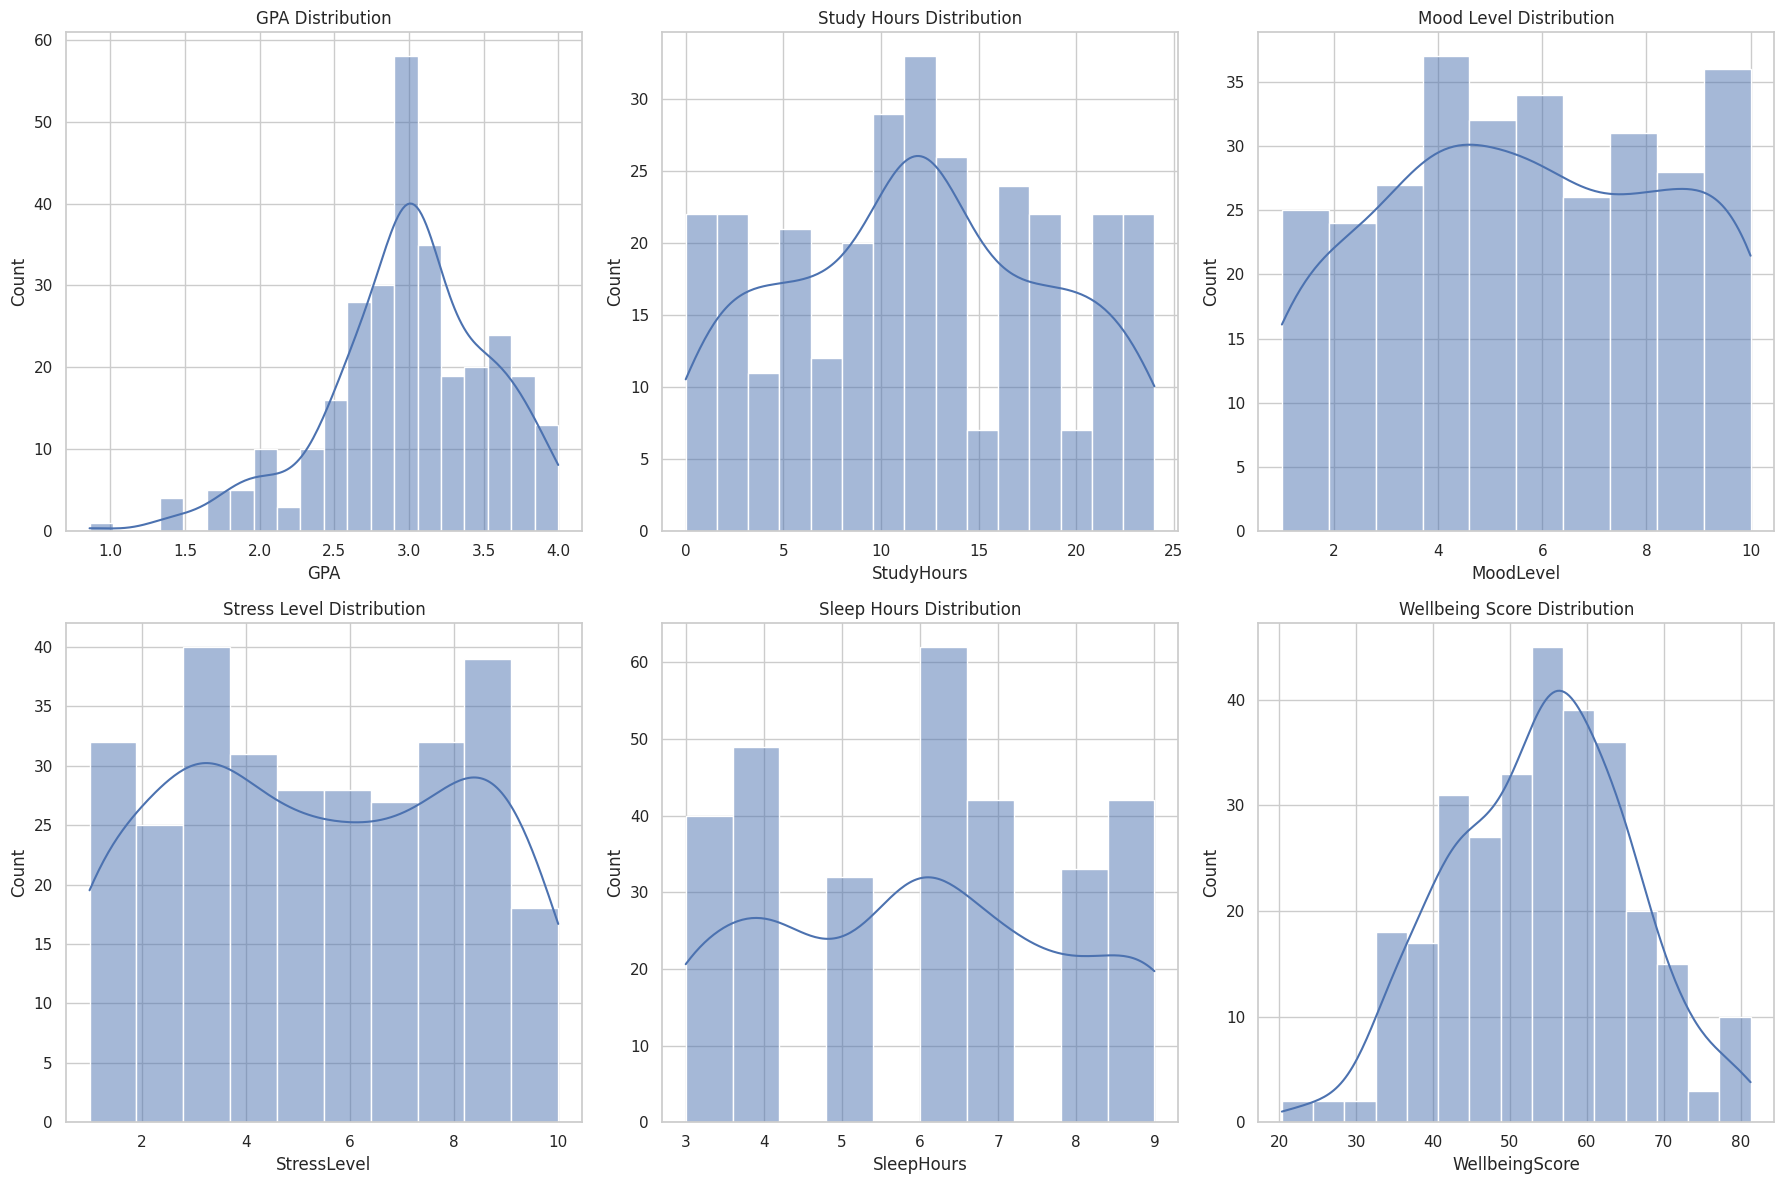

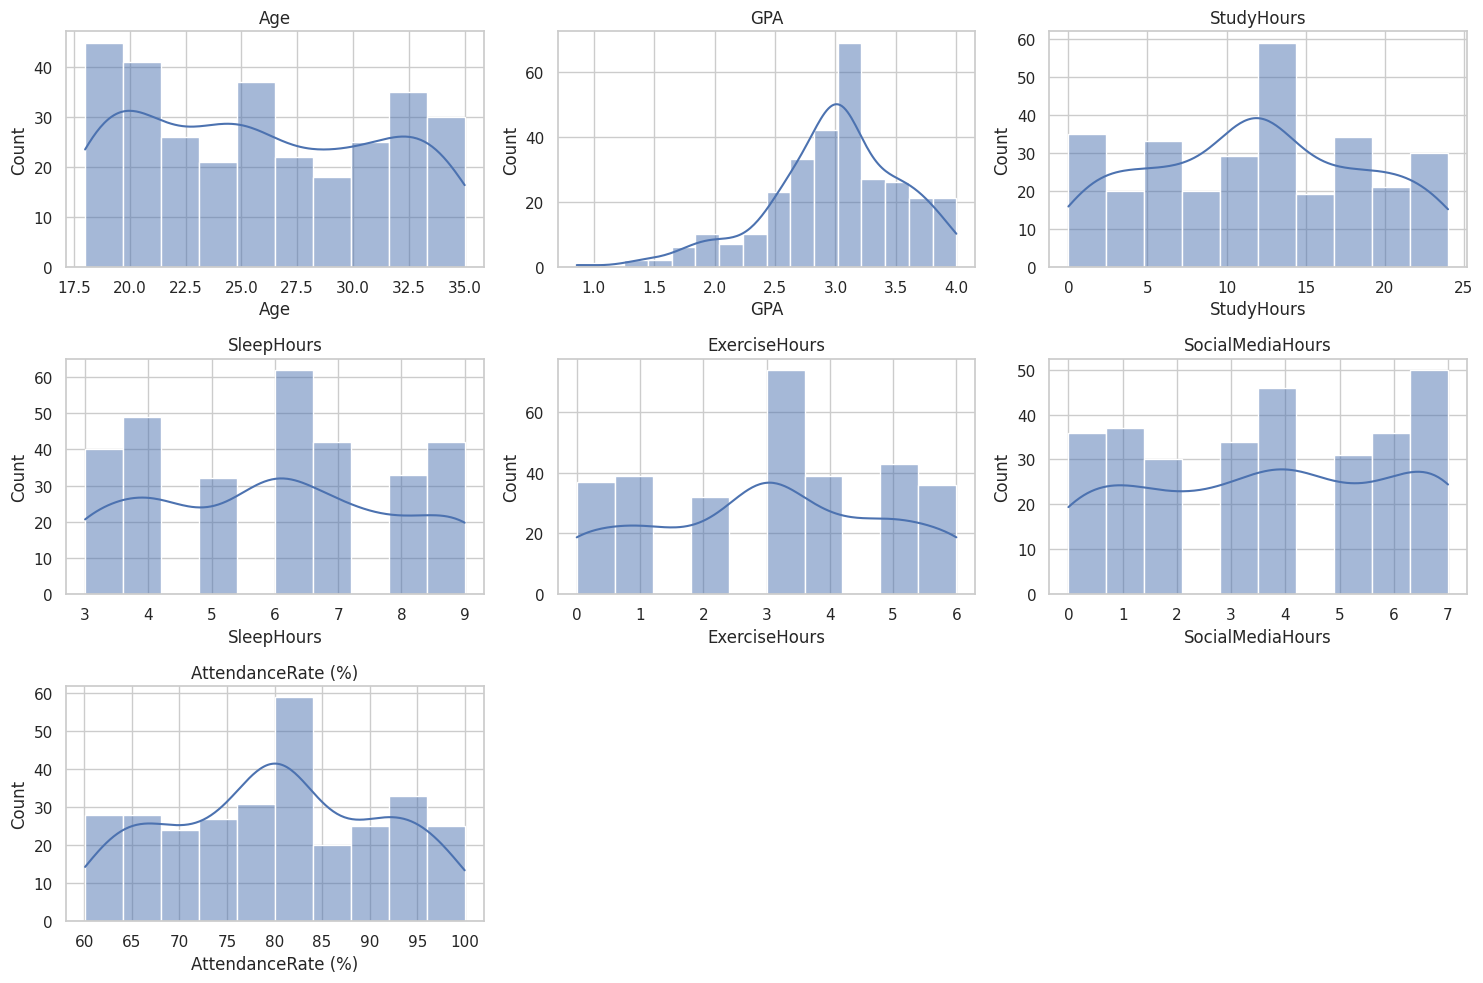

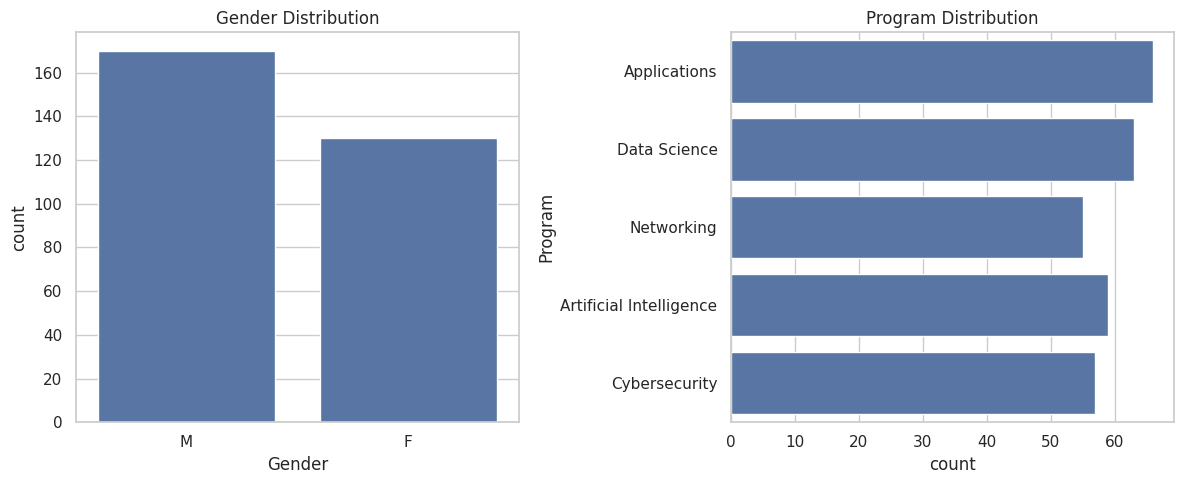

In [31]:
# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))

# GPA Distribution
plt.subplot(2, 3, 1)
sns.histplot(df['GPA'], kde=True, bins=20)
plt.title('GPA Distribution')

# Study Hours Distribution
plt.subplot(2, 3, 2)
sns.histplot(df['StudyHours'], kde=True, bins=15)
plt.title('Study Hours Distribution')

# Mood Level Distribution
plt.subplot(2, 3, 3)
sns.histplot(df['MoodLevel'], kde=True, bins=10)
plt.title('Mood Level Distribution')

# Stress Level Distribution
plt.subplot(2, 3, 4)
sns.histplot(df['StressLevel'], kde=True, bins=10)
plt.title('Stress Level Distribution')

# Sleep Hours Distribution
plt.subplot(2, 3, 5)
sns.histplot(df['SleepHours'], kde=True, bins=10)
plt.title('Sleep Hours Distribution')

# Wellbeing Score Distribution
plt.subplot(2, 3, 6)
sns.histplot(df['WellbeingScore'], kde=True, bins=15)
plt.title('Wellbeing Score Distribution')

plt.tight_layout()
plt.show()

# Numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Categorical variables
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')

plt.subplot(1, 2, 2)
sns.countplot(data=df, y='Program')
plt.title('Program Distribution')
plt.tight_layout()
plt.show()

## Bivariate Analysis

<Figure size 1500x1000 with 0 Axes>

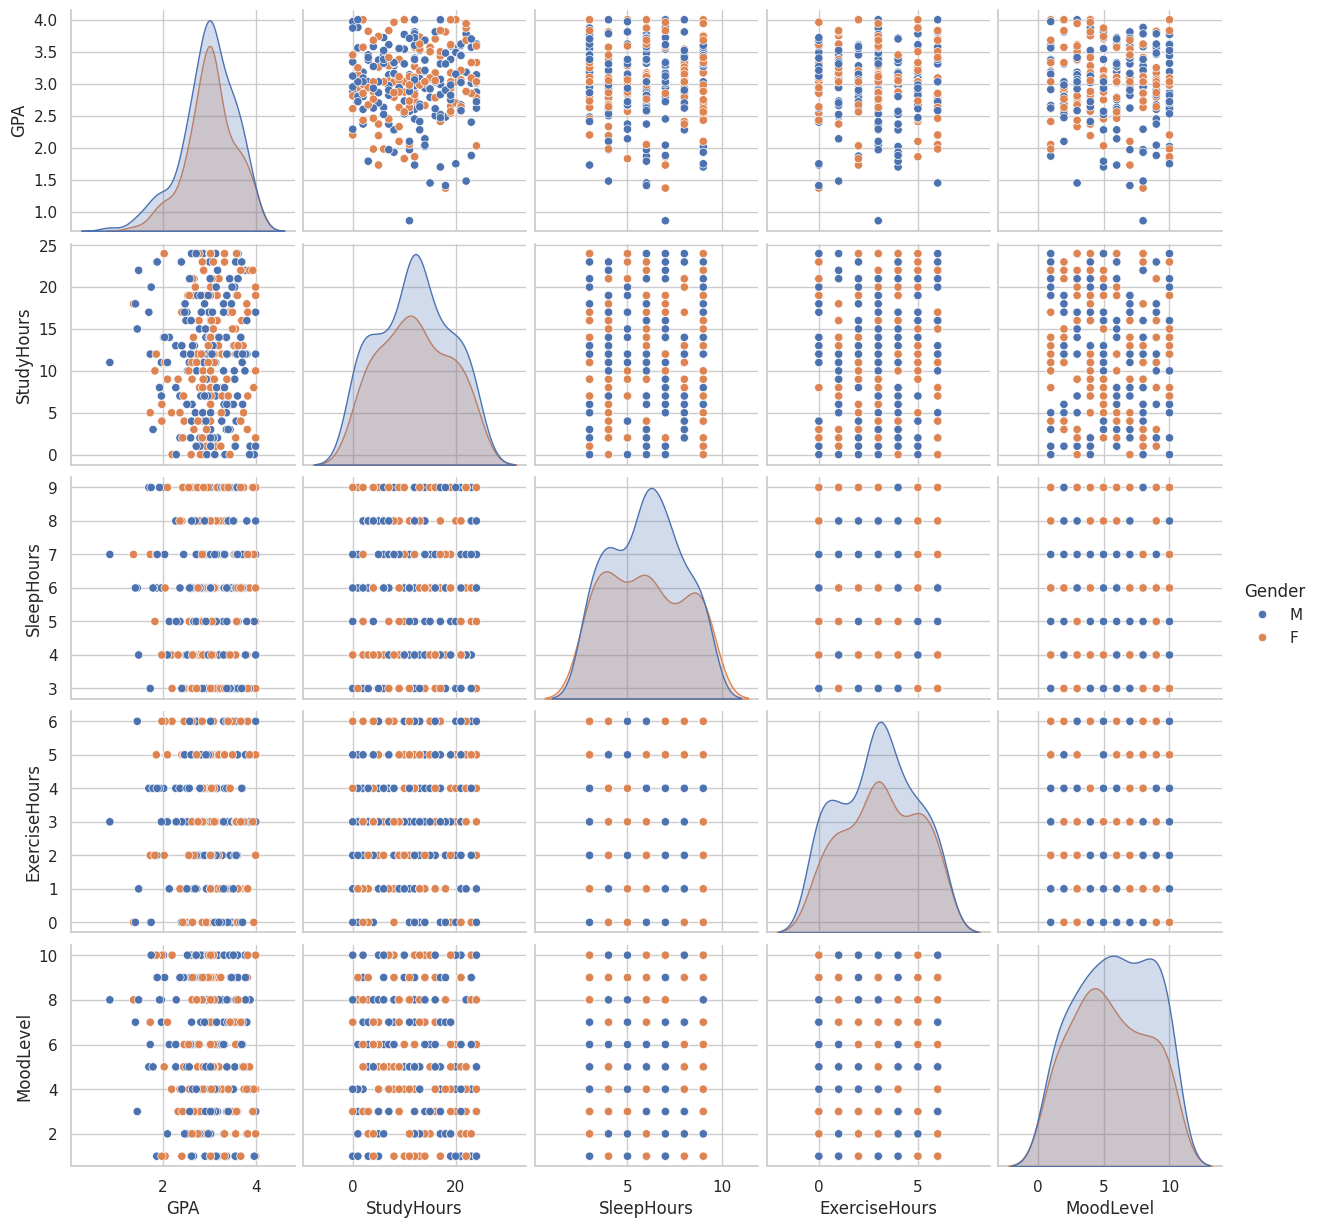

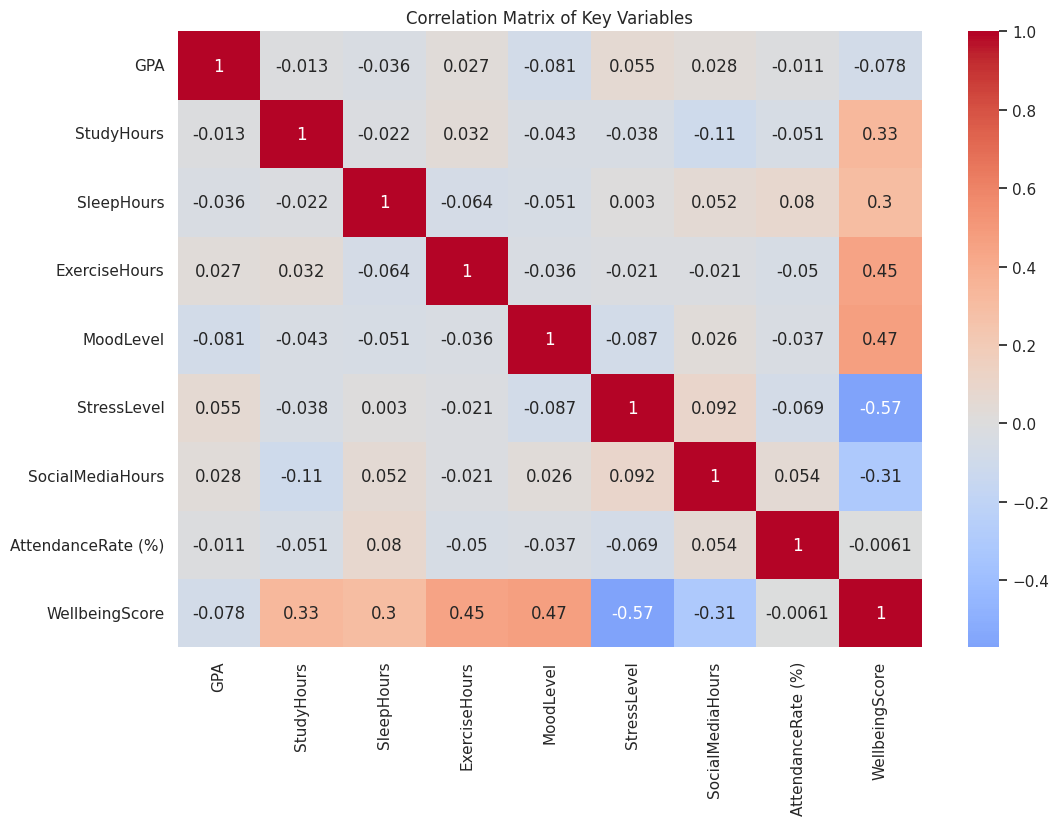

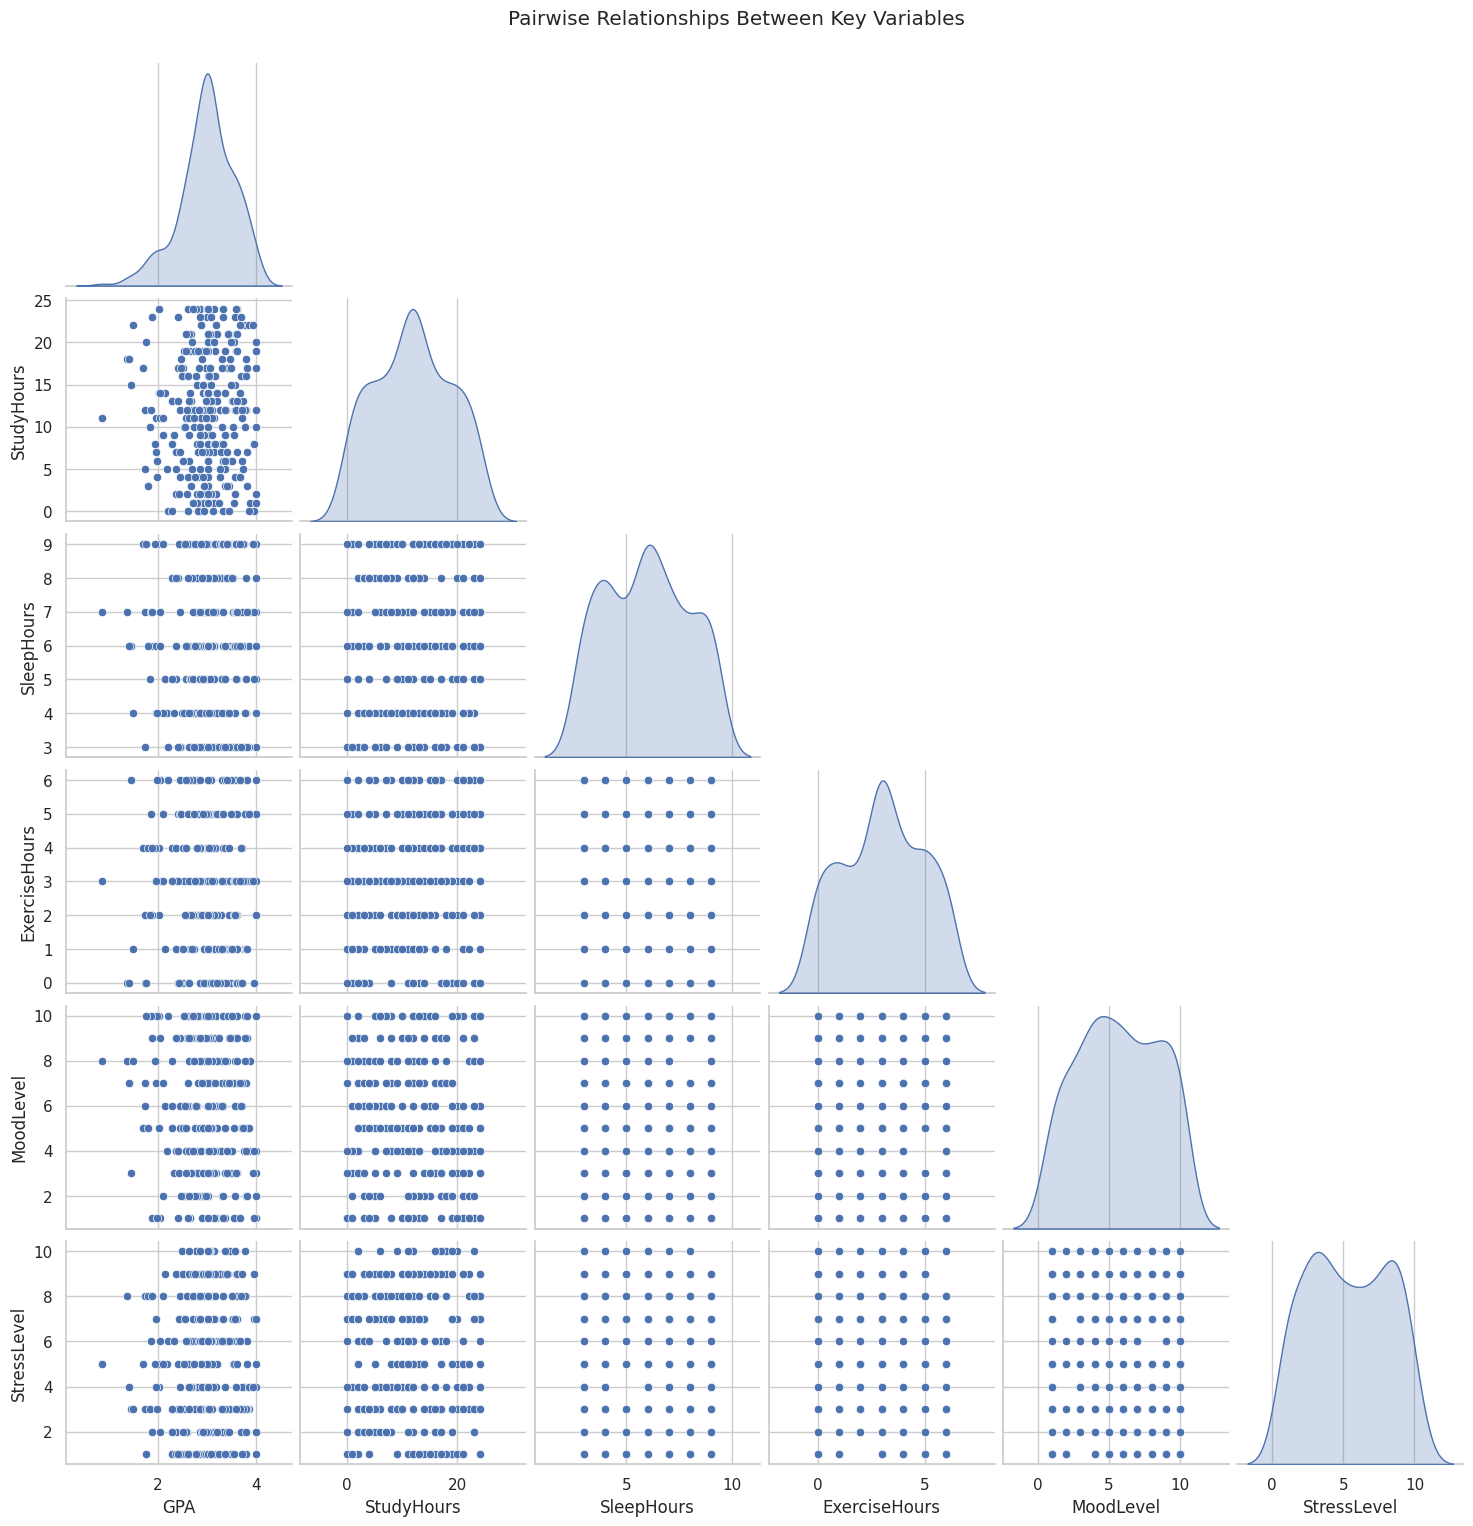

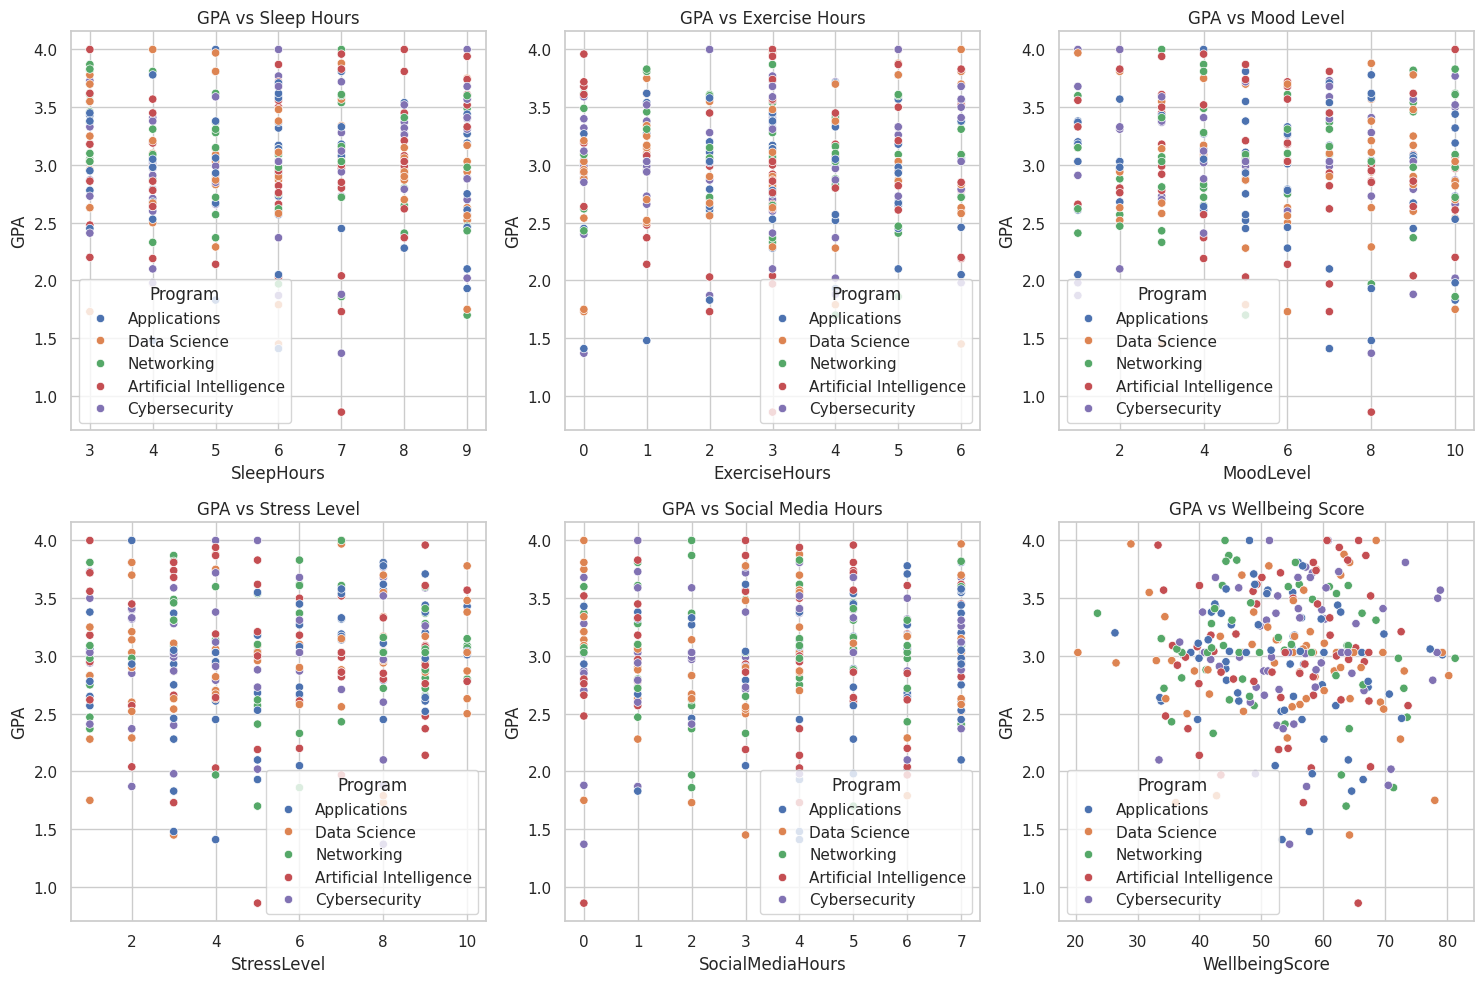

In [32]:
# Relationship between GPA and other factors
plt.figure(figsize=(15, 10))
sns.pairplot(data=df, vars=['GPA', 'StudyHours', 'SleepHours', 'ExerciseHours', 'MoodLevel'],
             hue='Gender', diag_kind='kde')
plt.show()

# Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = df[['GPA', 'StudyHours', 'SleepHours', 'ExerciseHours',
                 'MoodLevel', 'StressLevel', 'SocialMediaHours',
                 'AttendanceRate (%)', 'WellbeingScore']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Key Variables')
plt.show()

# Scatterplot Matrix
sns.pairplot(df[['GPA', 'StudyHours', 'SleepHours', 'ExerciseHours',
                'MoodLevel', 'StressLevel']],
             diag_kind='kde', corner=True)
plt.suptitle('Pairwise Relationships Between Key Variables', y=1.02)
plt.show()

# GPA vs Wellbeing Metrics
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.scatterplot(data=df, x='SleepHours', y='GPA', hue='Program')
plt.title('GPA vs Sleep Hours')

plt.subplot(2, 3, 2)
sns.scatterplot(data=df, x='ExerciseHours', y='GPA', hue='Program')
plt.title('GPA vs Exercise Hours')

plt.subplot(2, 3, 3)
sns.scatterplot(data=df, x='MoodLevel', y='GPA', hue='Program')
plt.title('GPA vs Mood Level')

plt.subplot(2, 3, 4)
sns.scatterplot(data=df, x='StressLevel', y='GPA', hue='Program')
plt.title('GPA vs Stress Level')

plt.subplot(2, 3, 5)
sns.scatterplot(data=df, x='SocialMediaHours', y='GPA', hue='Program')
plt.title('GPA vs Social Media Hours')

plt.subplot(2, 3, 6)
sns.scatterplot(data=df, x='WellbeingScore', y='GPA', hue='Program')
plt.title('GPA vs Wellbeing Score')

plt.tight_layout()
plt.show()

## Program and Gender Comparisons

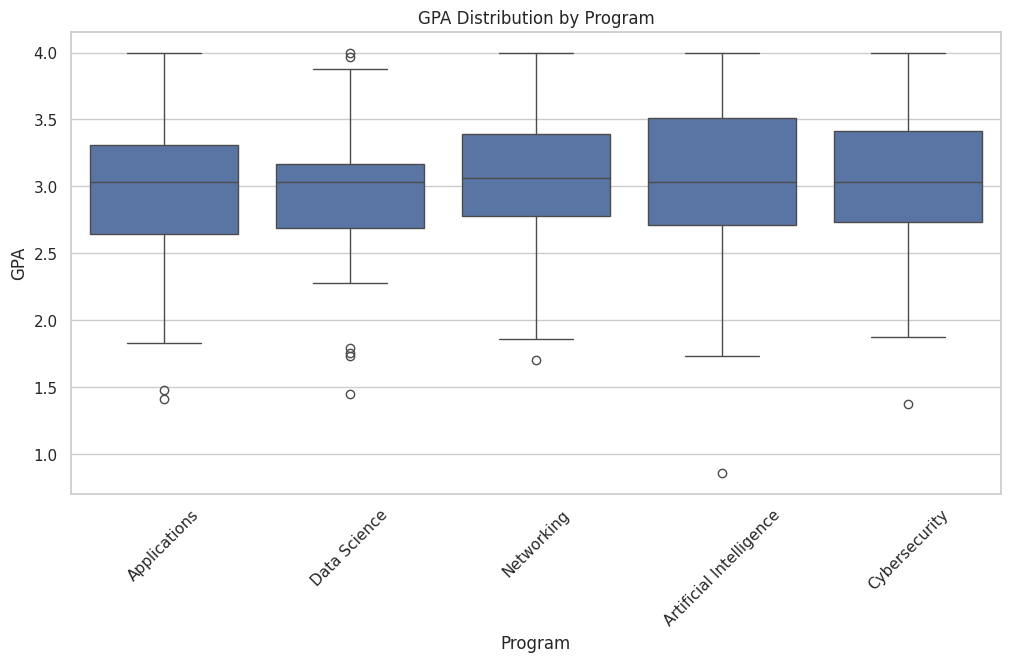

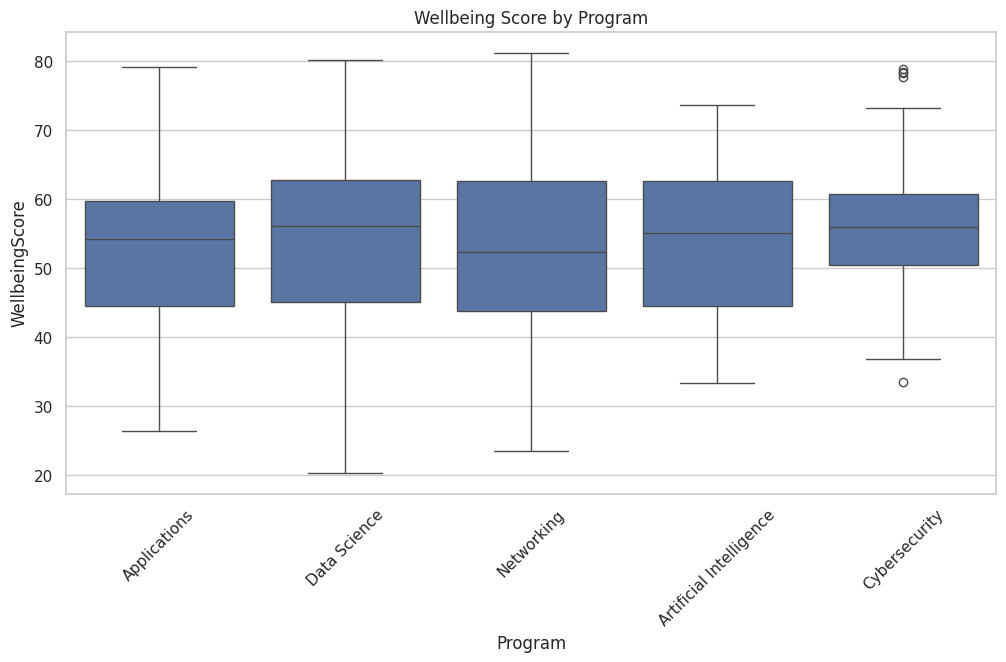

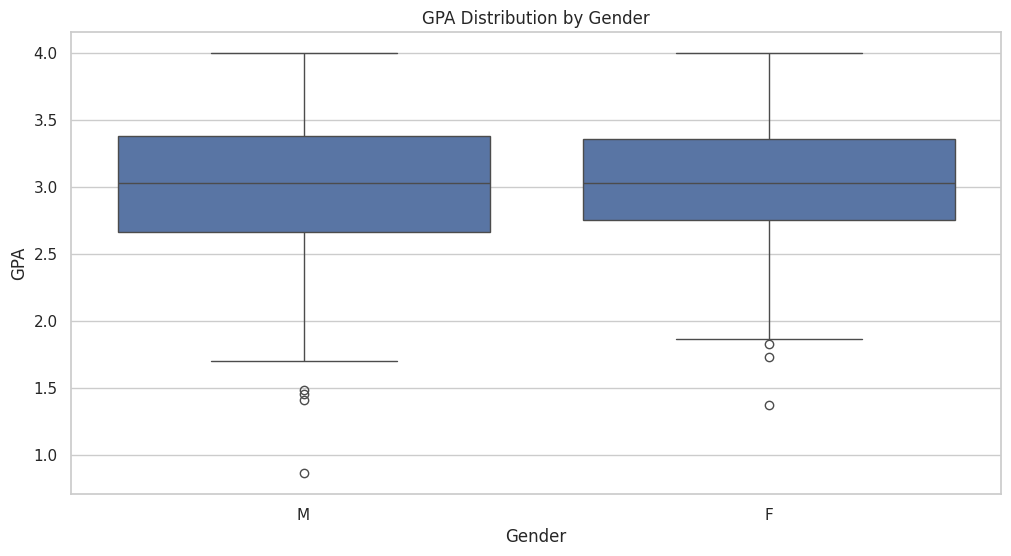

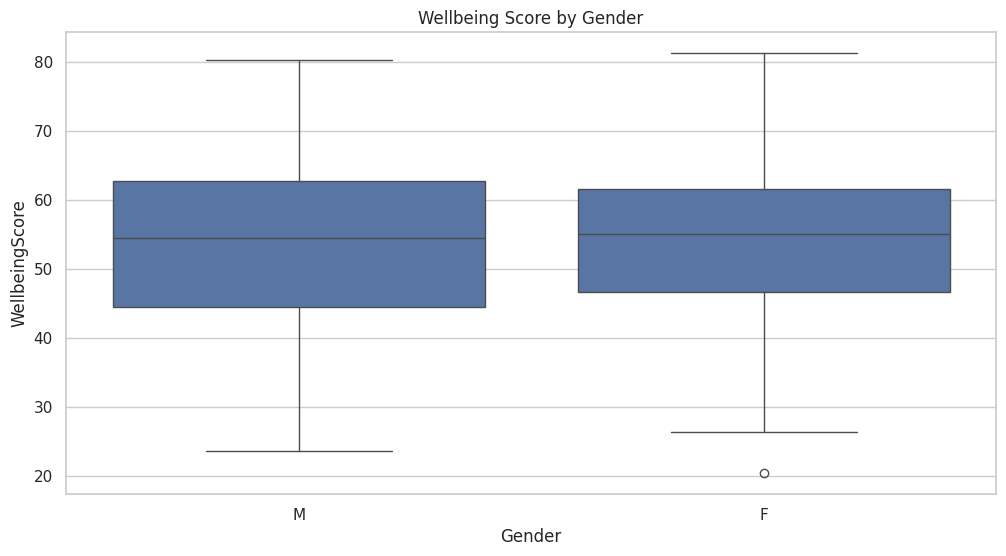

In [33]:
# Academic Performance by Program
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Program', y='GPA')
plt.title('GPA Distribution by Program')
plt.xticks(rotation=45)
plt.show()

# Wellbeing by Program
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Program', y='WellbeingScore')
plt.title('Wellbeing Score by Program')
plt.xticks(rotation=45)
plt.show()

# Gender Comparisons
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Gender', y='GPA')
plt.title('GPA Distribution by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Gender', y='WellbeingScore')
plt.title('Wellbeing Score by Gender')
plt.show()

## Program-wise Analysis

/tmp/ipython-input-16-775070056.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  program_metrics = df.groupby('Program')[['GPA', 'StudyHours', 'SleepHours',


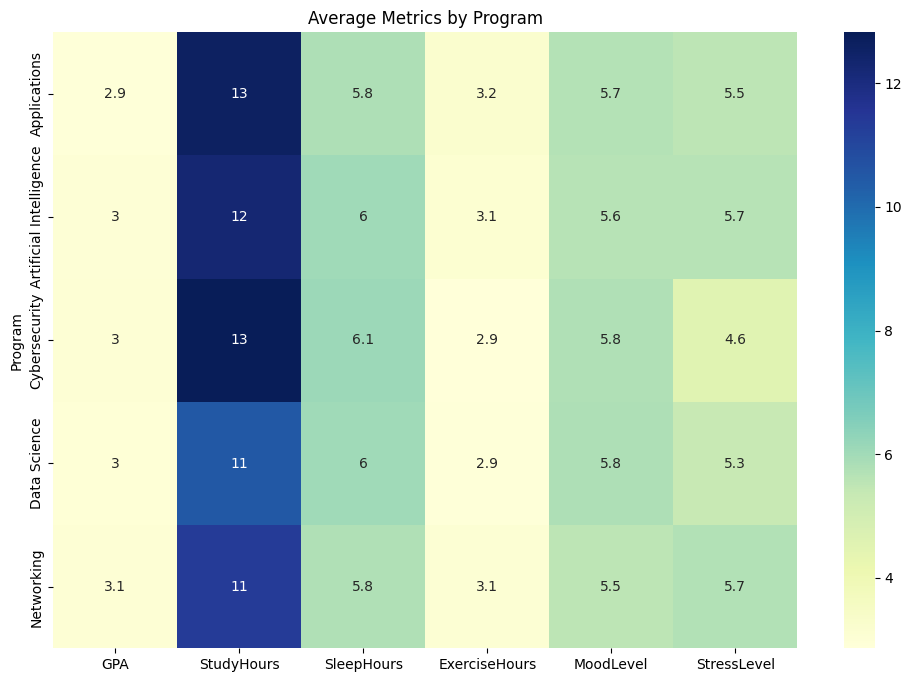

In [16]:
# Compare metrics across different programs
program_metrics = df.groupby('Program')[['GPA', 'StudyHours', 'SleepHours',
                                        'ExerciseHours', 'MoodLevel', 'StressLevel']].mean()

plt.figure(figsize=(12, 8))
sns.heatmap(program_metrics, annot=True, cmap='YlGnBu')
plt.title('Average Metrics by Program')
plt.show()

## Mood and Stress Analysis

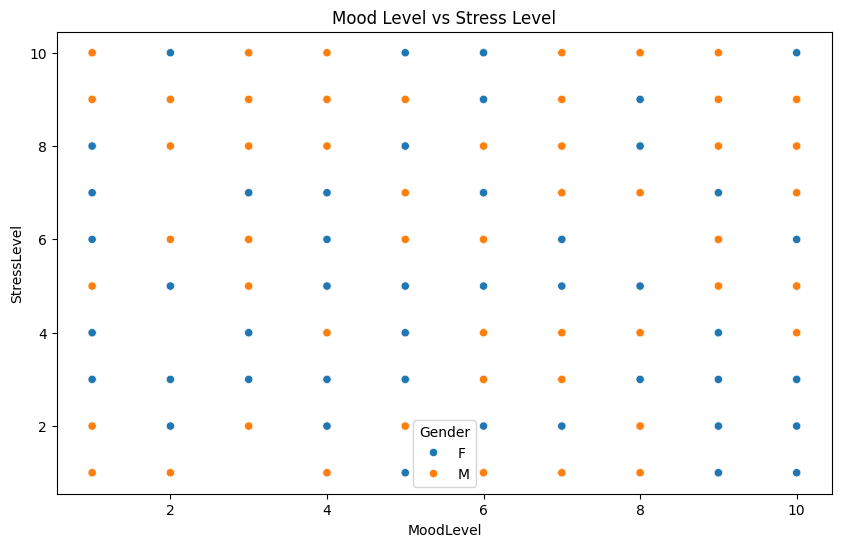

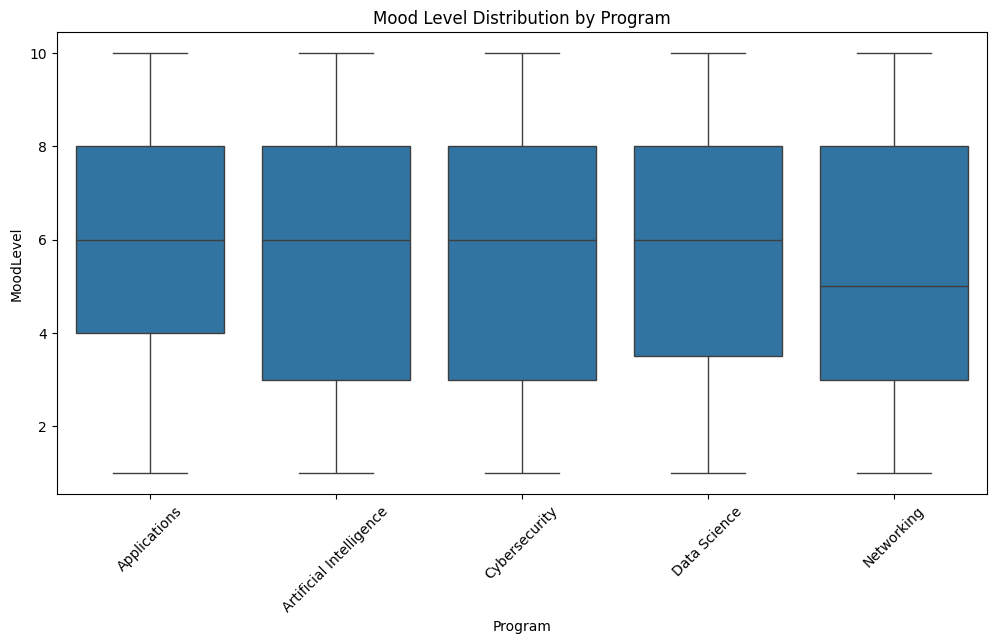

In [17]:
# Mood vs Stress levels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MoodLevel', y='StressLevel', hue='Gender')
plt.title('Mood Level vs Stress Level')
plt.show()

# Distribution of mood levels by program
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Program', y='MoodLevel')
plt.title('Mood Level Distribution by Program')
plt.xticks(rotation=45)
plt.show()

## Time Usage Analysis

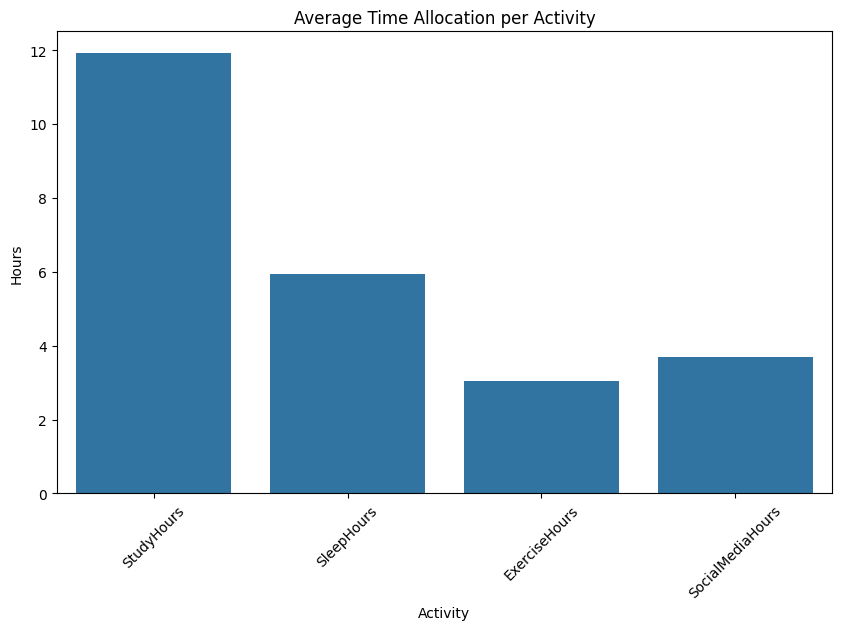

In [18]:
# Time allocation analysis
time_cols = ['StudyHours', 'SleepHours', 'ExerciseHours', 'SocialMediaHours']
time_df = df[time_cols].mean().reset_index()
time_df.columns = ['Activity', 'Hours']

plt.figure(figsize=(10, 6))
sns.barplot(data=time_df, x='Activity', y='Hours')
plt.title('Average Time Allocation per Activity')
plt.xticks(rotation=45)
plt.show()

## Attendance Analysis

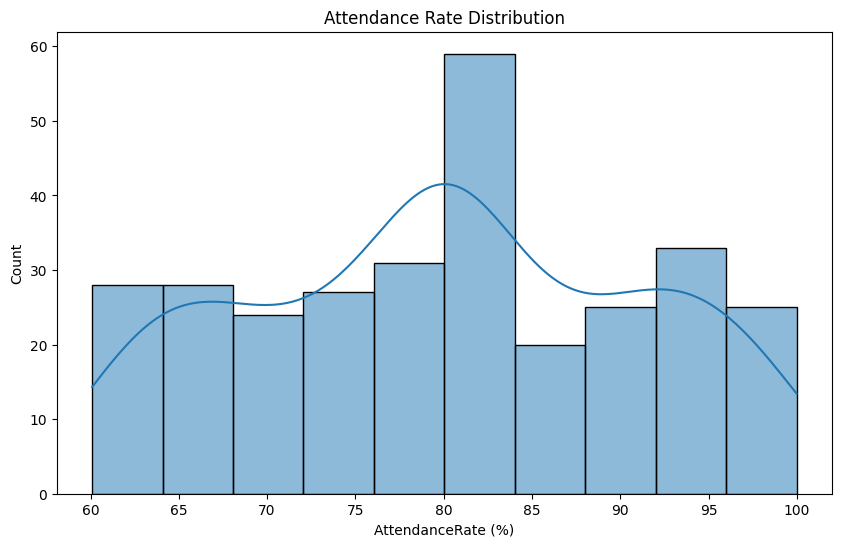

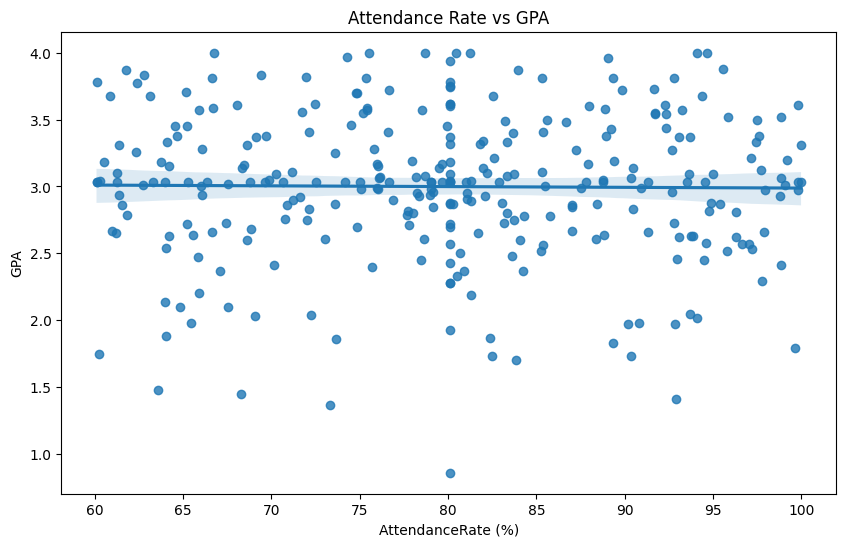

In [19]:
# Attendance rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['AttendanceRate (%)'], kde=True)
plt.title('Attendance Rate Distribution')
plt.show()

# Attendance vs GPA
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='AttendanceRate (%)', y='GPA')
plt.title('Attendance Rate vs GPA')
plt.show()

## Wellbeing Score Analysis

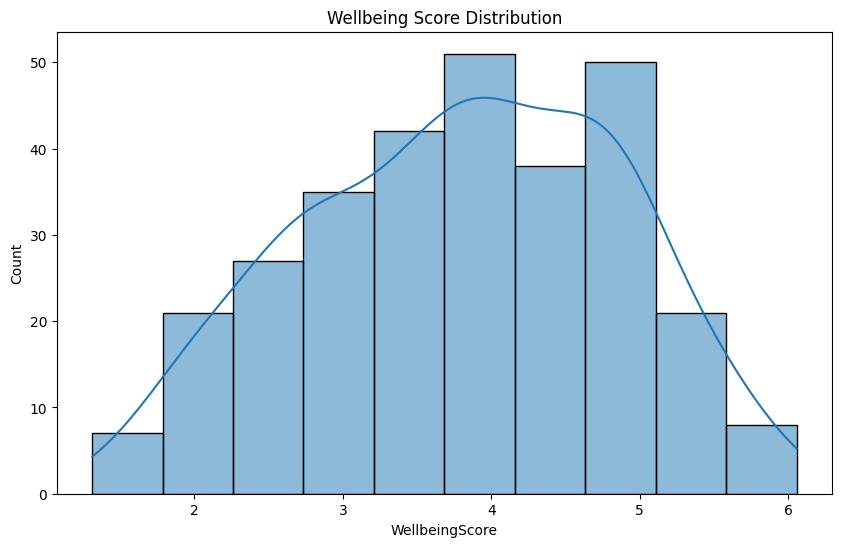

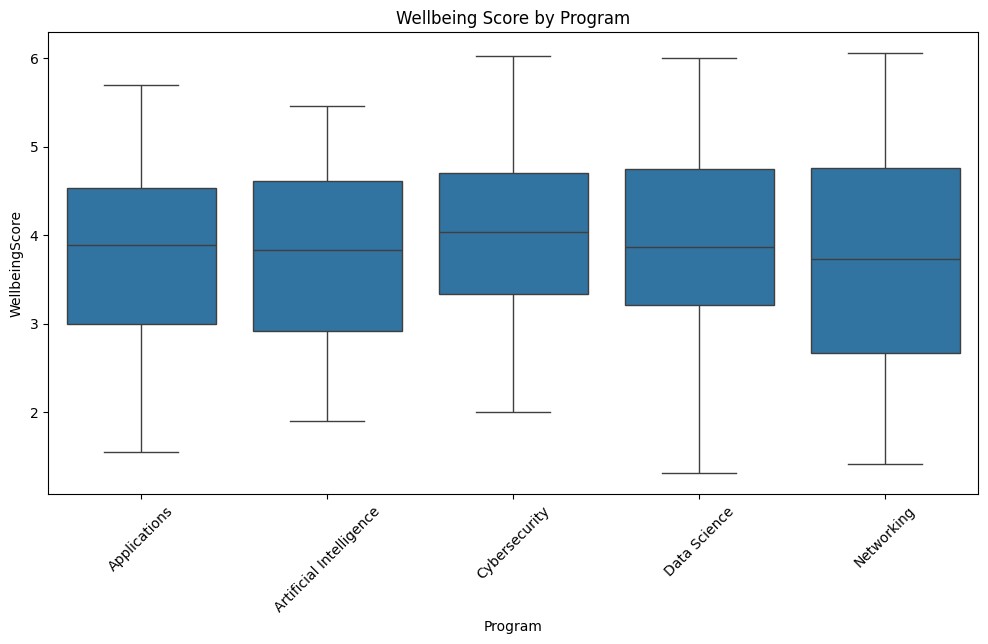

In [20]:
# Distribution of wellbeing score
plt.figure(figsize=(10, 6))
sns.histplot(df['WellbeingScore'], kde=True)
plt.title('Wellbeing Score Distribution')
plt.show()

# Wellbeing by program
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Program', y='WellbeingScore')
plt.title('Wellbeing Score by Program')
plt.xticks(rotation=45)
plt.show()